# D212 - Data Mining II
### OFM3 Task 2: Dimensionality Reduction Methods
#### Data Mining II — D212
#### PRFA — OFM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.06.5 : Dimensionality Reduction Methods
> The graduate implements dimension reduction methods to identify significant variables.

#### Table of Contents
<ul>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives and Goals of Analysis</a></li>
    <li><a href="#explination-of-pca">B1: Explanation of Principal Component Analysis (PCA)</a></li>
    <li><a href="#assumptions">B2: Assumptions of PCA Analysis</a></li>
    <li><a href="#identifying-continuous-dataset">C1: Identifying Continuious Dataset Variables</a></li>
    <li><a href="#standardizing-variables">C2: Standardizing Dataset Variables</a></li>
    <li><a href="#principal-component-matrix">D1: Principal Component Matrix</a></li>
    <li><a href="#identify-number-of-components">D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion</a></li>
    <li><a href="#identify-variance">D3: Identify Variance of each Component</a></li>
    <li><a href="#identify-total-variance">D4: Identify Total Variance Captured by the PCA</a></li>
    <li><a href="#summary-of-data-analysis">D5: Summarize Data Analysis</a></li>
    <li><a href="#code-references">E: Code References</a></li>
    <li><a href="#source-references">F: Source References</a></li>
</ul>

<a id="research-question"></a>
# A1: Research Question

The issue of patient re-admission holds significant importance for various stakeholders, including patients themselves, governing bodies, and the financial aspects concerning both the patients and hospitals. Consequently, it necessitates a comprehensive evaluation from multiple perspectives with an ongoing commitment to enhancing re-admission rates. By effectively reducing re-admission rates, tangible benefits such as cost savings can be realized, not only for the patients but also for the hospitals involved.

In prior analysis scenarios in `D209`, re-admission analysis was conducted employing `Decision Tree Classification`. The hospital aims to explore diverse approaches to enhance accuracy.

**Research Question**

The research question at hand is as follows:

Can we achieve accurate and effective prediction of readmission by utilizing multiple `Decision Tree Classifiers`, specifically known as `Random Forest Classifier`, subsequent to performing Principal Component Analysis (PCA) to reduce the dimensionality of the `WGU Medical Dataset`?

<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The primary objective of this analysis is to anticipate patient readmission, a critical concern for the WGU Hospital System due to its association with government fines, potential legal liabilities, and the inefficient allocation of hospital resources. By reducing readmissions, the hospital aims to optimize patient care, avoiding the need for repetitive treatments and complications. Ultimately, achieving this goal will not only enhance patient outcomes and satisfaction following their initial hospitalization but also yield substantial positive impacts for both patients and the hospital system as a whole.

<a id="explination-of-pca"></a>
# B1: Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical method used to simplify the complexity in high-dimensional (lots of columns) datasets while retaining as much of the original variance as possible. At its core, PCA seeks to identify "directions" or "principal components" in the data that capture the most variance. These components are orthogonal to each other, meaning the first principal component captures the most variance, the second (which is perpendicular to the first) captures the next highest amount, and so on. 

Another way to say this is, "Often, variables will vary together (covary), and some of the variation in one is actually duplicated by variation in another (e.g., restaurant checks and tips). Principal components analysis (PCA) is a technique to discover the way in which numeric variables covary." (Upadhyay et al., 2019).

"Principal component analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closet to the data, and then it projects the data onto it..." (Geron, 2022).

<a id="assumptions"></a>
# B2: Assumption of PCA Analysis
##### Summarize 1 assumption of PCA.

Principal Component Analysis (PCA) operates on the basis of either covariance matrix or singular value decomposition. It's essential that the dataset used with PCA is of a sufficiently large size. Smaller datasets might be adversely affected by data noise, hindering the accurate depiction of the inherent data structure. In essence, the more comprehensive the data, the better PCA captures the intrinsic relationships among its features.

<a id="identifying-continuous-dataset"></a>
# C1: Identifying Continuous Dataset Variables

Principal Component Analysis (PCA) is specifically tailored for quantitative data, as it produces a matrix based on covariance calculations, which necessitate numerical input. While there exist variants of PCA suited for qualitative (categorical) data, those fall outside the purview of this performance assessment. Therefore, we will focus on the quantitative features from the `medical_clean.csv` dataset provided by [`WGU`](https://www.wgu.edu/).

| Continuous Feature Name | Description ([`WGU Data Dictionary`](https://access.wgu.edu/ASP3/aap/content/jf8rcds032ldktfces9r.html))                                                                                                                                                                                                                     |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lat                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Lng                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Population              | Population within a mile radius of patient, based on census data                                                                                                                                                                                            |
| Children                | Number of children in the patient’s household as reported in the admissions information might not be children of the patient                                                                                                                                |
| Age                     | Age of the patient as reported in admissions information                                                                                                                                                                                                    |
| Income                  | Annual income of the patient (or primary insurance holder) as reported at time of admission                                                                                                                                                                 |
| VitD_levels             | The patient’s vitamin D levels as measured in ng/mL                                                                                                                                                                                                         |
| Doc_visits              | Number of times the primary physician visited the patient during the initial hospitalization                                                                                                                                                                |
| Full_meals_eaten        | Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)                                                                                                       |
| VitD_supp               | The number of times that vitamin D supplements were administered to the patient                                                                                                                                                                             |
| Initial_days            | The number of days the patient stayed in the hospital during the initial visit                                                                                                                                                                              |
| TotalCharge             | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients not including specialized treatments. |
| Additional_charges      | The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc                                                                                                                                          |

In a preliminary assessment, certain features appear to be candidates for removal based on visual inspection. However, to ensure a thorough and systematic evaluation, we will employ the Principal Component Analysis (PCA) method and refrain from manually eliminating any quantitative (numerical) features.

<a id="standardizing-variables"></a>
# C2: Standardizing Dataset Variables

This performance assessment is organized into distinct sections to ensure each step is clearly presented and comprehensively executed. While the entire process can be streamlined using [`Scikit-Learn Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), we've chosen not to employ this method here for the sake of clarity in demonstrating the assessment.

In this analysis, we will import the `medical_clean.csv` dataset, which is provided by [`WGU`](https://www.wgu.edu/), and proceed with its standardization. For this standardization phase, we will focus solely on the quantitative (numerical) values as outlined in Section `C1`. This process encompasses two primary steps:

   1. **Standardization**: This involves scaling all values such that they have a mean of 0 and a standard deviation (std) of 1. This transformation will be executed using the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) library.
   
   2. **Covariance Matrix Generation**: The resulting matrix will help us identify if any of the features (columns) display perfect correlation. In cases of perfect correlation between features, redundancy is evident; hence, one feature can be retained while the correlated counterpart is discarded.

In [279]:
from typing import List, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Set max rows to display all rows without truncation
pd.set_option('display.max_rows', None)

color_map = 'BuGn'

medical_clean = pd.read_csv('./medical_clean.csv', index_col=0)
#print(medical_clean)

#These are the columns stated within Section C1 of the performance assessment
quantitative_columns = [
    'Lat',
    'Lng',
    'Population',
    'Children',
    'Age',
    'Income',
    'VitD_levels',
    'Doc_visits',
    'Full_meals_eaten',
    'vitD_supp',
    'Initial_days',
    'TotalCharge',
    'Additional_charges'
]

x_features = medical_clean[quantitative_columns].copy()
y_target = medical_clean['ReAdmis'].copy()

print('Quantitative Feature')
print(x_features)

print('Target Variable')
print(y_target)

Quantitative Feature
                Lat        Lng  Population  Children  Age     Income   
CaseOrder                                                              
1          34.34960  -86.72508        2951         1   53   86575.93  \
2          30.84513  -85.22907       11303         3   51   46805.99   
3          43.54321  -96.63772       17125         3   53   14370.14   
4          43.89744  -93.51479        2162         0   78   39741.49   
5          37.59894  -76.88958        5287         1   22    1209.56   
6          35.67302  -95.19180         981         3   76   81999.88   
7          41.67511  -81.05788        2558         0   50   10456.05   
8          39.08062  -78.39150         479         7   40   38319.29   
9          30.20097  -85.50610       40029         0   48   55586.48   
10         45.40325  -94.71424        5840         2   78   38965.22   
11         32.59914  -88.67903         426         4   55   38503.82   
12         28.66268  -81.31427       35369 

In [280]:
'''
Standardization Process:
    X features will be standardized to prevent larger values from dominating the smaller features
        1. Fit the data model 
        2. Transform the data into the standardized format.
        3. Verify that the standardization happened
        
    NOTE: there is a "fit_transform" function but I have separated these steps for clarity.
'''

def standardize_features(features: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    """Function for standardizing the features as this process can be repeated"""
    standard_scaler = StandardScaler()
    standard_scaler.fit(features)
    
    scaled_data = standard_scaler.transform(features.copy())
    
    scaled_features = pd.DataFrame(scaled_data, columns=columns)
    return scaled_features

x_features_scaled = standardize_features(x_features, quantitative_columns)

verification_data = {
    'Feature': x_features_scaled.columns,
    'Scaled Mean': round(x_features_scaled.mean(), 4),
    'Scaled Std': round(x_features_scaled.std(), 4)
}

verification_table = pd.DataFrame(verification_data)
verification_table

,Feature,Scaled Mean,Scaled Std
Lat,Lat,-0.0,1.0001
Lng,Lng,0.0,1.0001
Population,Population,-0.0,1.0001
Children,Children,0.0,1.0001
Age,Age,0.0,1.0001
Income,Income,0.0,1.0001
VitD_levels,VitD_levels,-0.0,1.0001
Doc_visits,Doc_visits,0.0,1.0001
Full_meals_eaten,Full_meals_eaten,-0.0,1.0001
vitD_supp,vitD_supp,0.0,1.0001


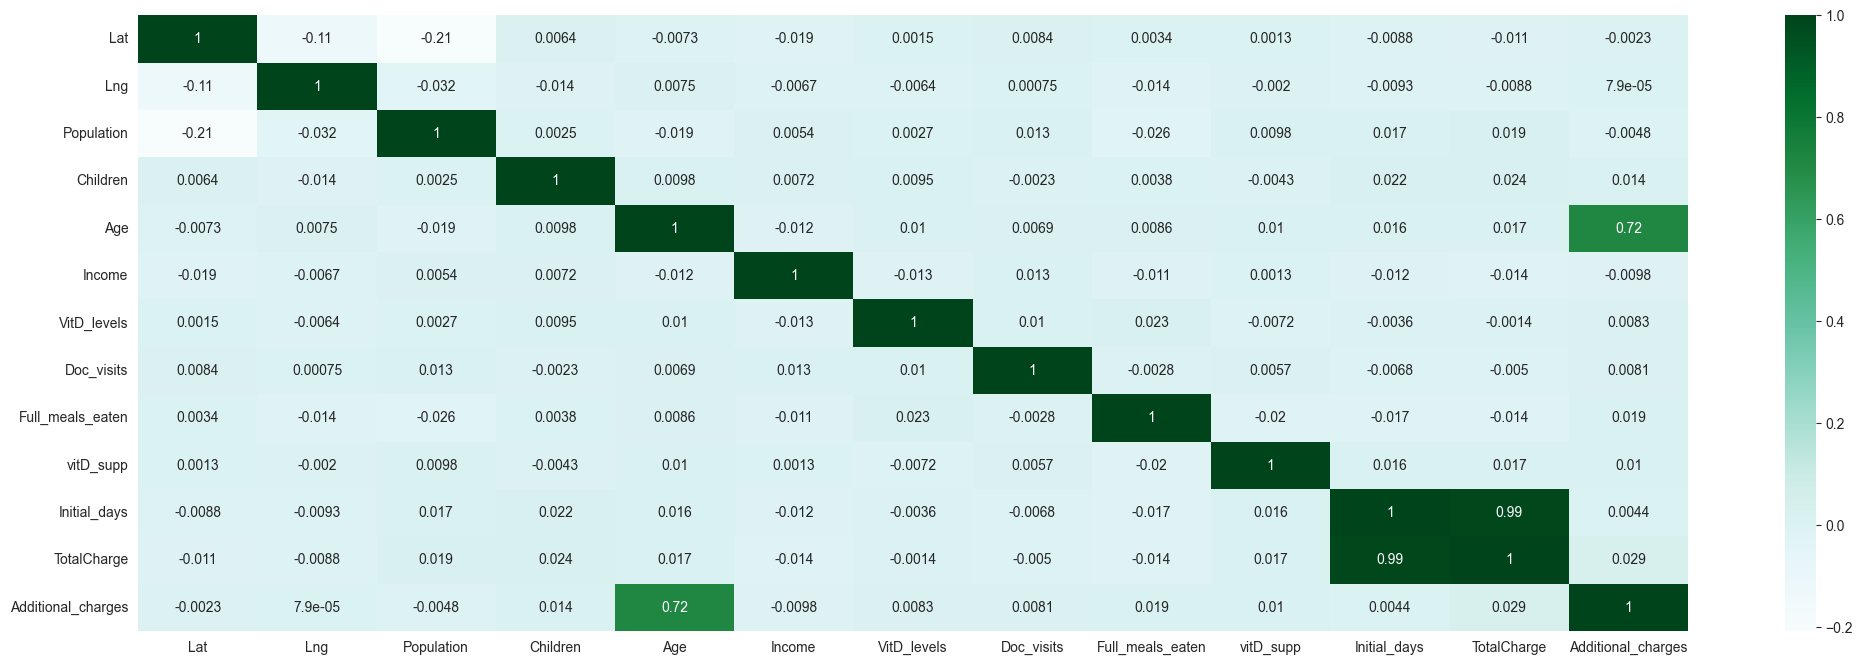

In [281]:
'''
Covariance Matrix
    Is a matrix that provides linear relationships between features (columns). A positive covariance value indicates that as one variable increases, the other tends to increase as well, while a negative value indicates that as one variable increases, the other tends to decrease. If the covariance is zero, it suggests that there's no linear relationship between those two variables.
    
To visually add
'''

def display_covariance_matrix(scaled_features: pd.DataFrame, filename: str) -> pd.DataFrame:
    features_covariance_matrix = scaled_features.cov()
    #styled_features_covariance_matrix = features_covariance_matrix.style.background_gradient(cmap='BuGn')
    
    plt.figure(figsize=(25, 8))  # Adjust the figure size as needed
    sns.heatmap(features_covariance_matrix, cmap=color_map, annot=True)
    plt.savefig(filename)
    plt.show()
    
    return features_covariance_matrix

covariance_matrix = display_covariance_matrix(x_features_scaled, './original-scaled-features-covariance-matrix.png')



###### Results of Co-Variance Matrix

The feature `TotalCharge`, representing daily charges, exhibits an extremely high correlation of 99% (0.99) with `Initial_days`, which denotes the duration of the initial hospital visit. Given the redundancy due to this near-perfect correlation, one of these features should be excluded. We will opt to remove 'Initial_days', positing that 'Additional_charges' could be more pertinent when considered alongside 'Total_charges'. After selecting an item for removal, the covariance matrix should be recalculated to ensure accuracy. It seems within the data community that 80% (.8) or 90 (.9)% is grounds for removal. It should be noted that `Additional_charges` was high at 72% (.72) but was below the 80% threshold and was not removed.

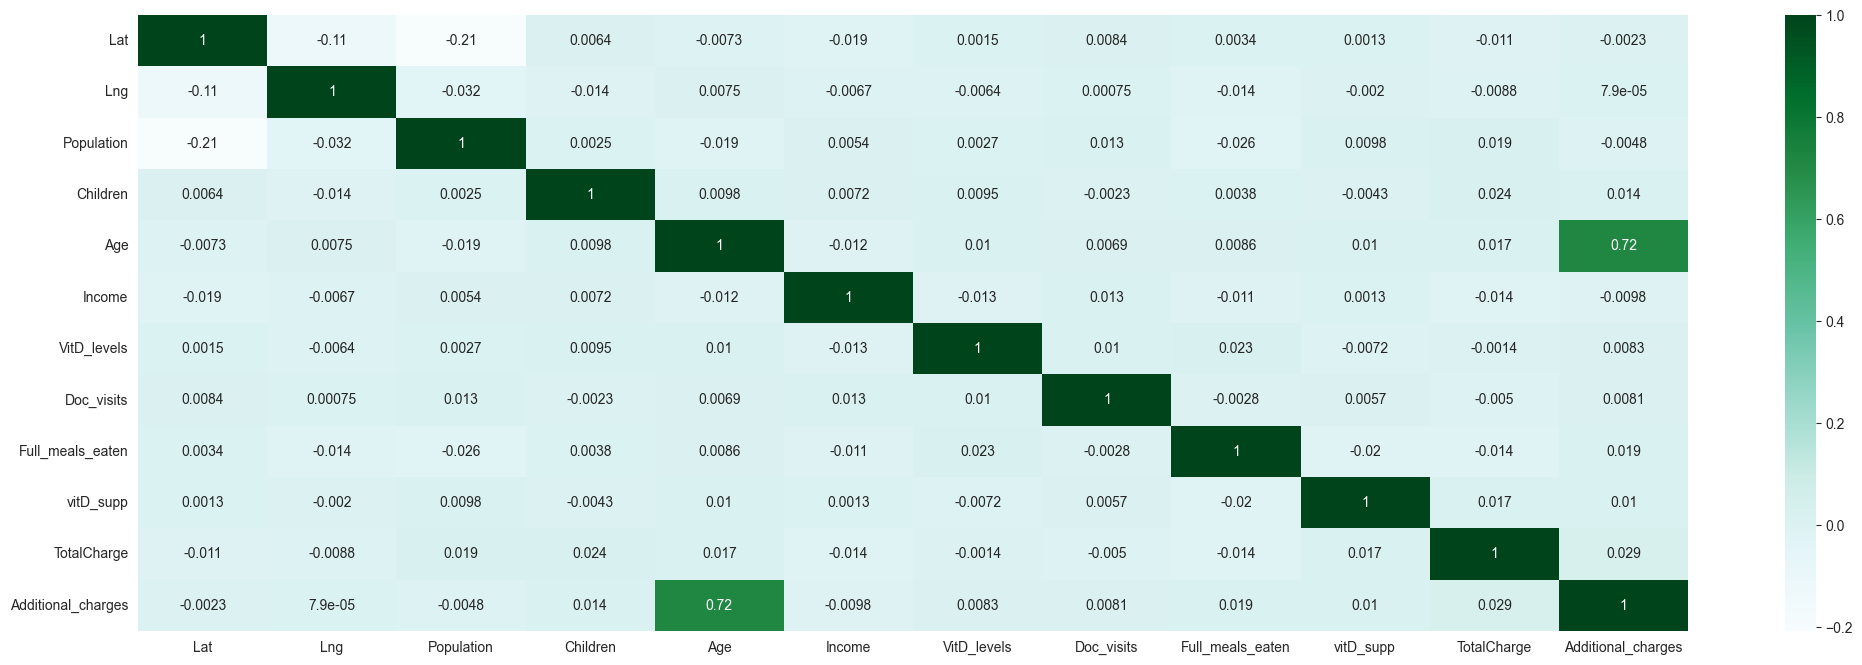

In [282]:
quantitative_columns.remove('Initial_days')
adjusted_x_features = medical_clean[quantitative_columns].copy() 

x_features_scaled = standardize_features(adjusted_x_features, quantitative_columns)

adjusted_covariance_matrix = display_covariance_matrix(x_features_scaled, './scaled-features-covariance-matrix-removal.png')

<a id="principal-component-matrix"></a>
# D1: Principal Component Matrix

The sequence of our data processing begins with the standardization of the dataset, followed by the elimination of highly correlated features. Subsequently, we'll proceed with the Principal Component Analysis (PCA). During this stage, we will fit the model and employ it to achieve dimensionality reduction. To discern which features (columns) exert the most influence on a given principal component (`PC`), we will generate and inspect the PCA loadings.

[`PCA Documentation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [283]:
n_components = len(quantitative_columns)
random_state = 999 # Pass an int for reproducible results across multiple function calls.

pca_component_labels = list()
for i in range(1, n_components + 1): #range is not inclusive of stop value so +1
    pca_component_labels.append(f'PC{i}')

def calculate_pca_loadings(num_components: int, r_state: int) -> Tuple[PCA, np.array, pd.DataFrame]:
    pca_reduction = PCA(n_components=num_components, random_state=r_state)
    
    #Fit the model with features(x)
    pca_reduction.fit(x_features_scaled)
    
    #Apply dimensional reduction to features(x)
    transformed = pca_reduction.transform(x_features_scaled)
    
    loadings = pd.DataFrame(pca_reduction.components_.T, columns=pca_component_labels, index=quantitative_columns)
    return pca_reduction, transformed, loadings
    

pca, pca_transformed, pca_loadings = calculate_pca_loadings(num_components=n_components, r_state=random_state)



### PCA Component High-Level Analysis

###### Lat (Latitude):

1. Strong negative contribution to the 2nd component.
2. Strong positive contribution to the 11th component.
3. The contributions to other components are relatively low.

##### Lng (Longitude):

1. Significant negative contribution to the 3rd component.
2. Notable positive contributions to the 2nd and 11th components.

##### Population:

1. Strong positive contributions to the 2nd and 11th components.
2. Moderate positive contribution to the 3rd component.

##### Children:

1. Strong positive contribution to the 6th component.
2. Notable negative contribution to the 7th component.
3. Moderate positive contribution to the 3rd component.

##### Age:

1. Very strong positive contributions to the 1st and 12th components.
2. The contributions to other components are quite low.

##### Income:

1. Strong positive contributions to the 5th and 10th components.

##### VitD_levels (Vitamin D Levels):

1. Strong negative contributions to the 6th and 9th components.
2. Notable positive contribution to the 8th component.
3. Moderate positive contribution to the 4th component.

###### Doc_visits (Doctor Visits):

1. Strong positive contributions to the 5th and 8th components.
2. Strong negative contributions to the 6th and 7th components.

##### Full_meals_eaten:

1. Very strong positive contribution to the 9th component.
2. Moderate positive contributions to the 4th and 8th components.

##### vitD_supp (Vitamin D Supplements):

1. Notable positive contribution to the 8th component.
2. Significant negative contributions to the 4th and 6th components.

### Key Insights:
1. Age has dominant loadings in the 1st and 12th components, suggesting that these components might capture some age-related variance in the data.
2. Full_meals_eaten has a dominant loading in the 9th component.
3. Latitude and Population have strong loadings in the 2nd and 11th components, which could indicate some geographic or demographic patterns.
4. Features related to health like Doc_visits, VitD_levels, and vitD_supp seem to contribute significantly across multiple components, suggesting that these features have a spread-out variance.

<a id="identify-number-of-components"></a>
# D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion

In the subsequent stage of our analysis, we will determine the proportion of variance in our data that each Principal Component (PC) contributes. If a PC has a negligible impact, it may be considered for removal.

In [284]:
def generate_pc_variance_table(columns: List[str], explained_variance_ratios: np.array) -> pd.DataFrame:
    data = {
        'Principal Component': columns,
        'Variance Contribution (%)': np.round(explained_variance_ratios * 100, 3)
    }
    
    pc_variance_table = pd.DataFrame(data, index=None)
    return pc_variance_table
    
pc_variance = generate_pc_variance_table(pca_loadings.columns, pca.explained_variance_ratio_)
pc_variance

,Principal Component,Variance Contribution (%)
0,PC1,14.340
1,PC2,10.243
2,PC3,8.757
3,PC4,8.665
4,PC5,8.520
5,PC6,8.374
6,PC7,8.316
7,PC8,8.148
8,PC9,8.076
9,PC10,7.985


[0.14339538 0.24582564 0.33339606 0.42004306 0.50524229 0.58898463
 0.67214028 0.7536172  0.83438091 0.91422923 0.97643961 1.        ]


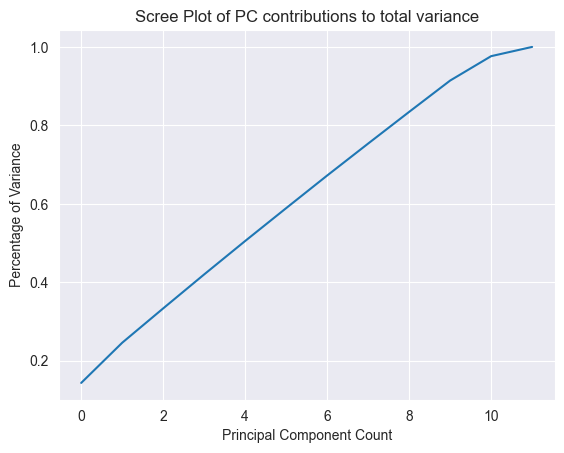

In [285]:
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
cumulative_sum_variance_rations = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_sum_variance_rations)

plt.plot(cumulative_sum_variance_rations)
plt.xlabel('Principal Component Count')
plt.ylabel('Percentage of Variance')
plt.title('Scree Plot of PC contributions to total variance')
plt.savefig('./scree-plot-pc-of-total-variance.png')
plt.show()

#### Analyzing the Variance of Principal Components

###### Distribution of Variance:

* The first four principal components contribute more than 8% of the variance each, with PC1 having the highest contribution at 14.340%.
* From PC5 to PC10, the contributions are quite close to each other, ranging from 8.520% to 7.985%.
* The last two principal components, PC11 and PC12, have noticeably lower contributions, with PC12 being only 2.356%.

###### Potential Reductions:

Given the diminishing contributions from PC9 to PC12, further evaluation is needed of the impact of omitting these components in the analysis. Depending on the context, retaining the most significant PCs can lead to a simpler model without significant loss of information.

<a id="identify-variance"></a>
# D3: Identify Variance of each Component
Based on the insights derived from Section D2, the Principal Components PC9 to PC12 will be excluded from the dataset. Subsequently, the analysis will be conducted again, and the results will be compared to evaluate the implications of this modification.

In [286]:
reduced_pca_components_labels = pca_component_labels
total_pc_removed = 0
for i in range(9, 13): # range is not inclusive for stop value
    to_remove = f'PC{i}'
    total_pc_removed += 1
    print(f'Removing Principal Component: {to_remove}')
    reduced_pca_components_labels.remove(to_remove)

print(f'Removed {total_pc_removed} Principal Components.')  
  
reduced_n_components = len(reduced_pca_components_labels)
reduced_pca, reduced_transformed, reduced_loadings = calculate_pca_loadings(num_components=reduced_n_components, r_state=random_state)

reduced_pc_variance = generate_pc_variance_table(reduced_loadings.columns, reduced_pca.explained_variance_ratio_)
reduced_pc_variance

Removing Principal Component: PC9
Removing Principal Component: PC10
Removing Principal Component: PC11
Removing Principal Component: PC12
Removed 4 Principal Components.


,Principal Component,Variance Contribution (%)
0,PC1,14.340
1,PC2,10.243
2,PC3,8.757
3,PC4,8.665
4,PC5,8.520
5,PC6,8.374
6,PC7,8.316
7,PC8,8.148


In [287]:
'''
After Principal Component (n_components) reduction compare with first run for consistency. 
'''
variance_contributions = 'Variance Contribution (%)'
initial = pc_variance[variance_contributions]
reduced = reduced_pc_variance[variance_contributions]

min_length = min(len(initial), len(reduced))

compare_pc_variance_runs_data = {
    'Principal Components': pca_component_labels,
    f'Initial {variance_contributions}': initial[:min_length],
    f'Reduced {variance_contributions}': reduced[:min_length]
}

compare_pc_variance_runs_table = pd.DataFrame(compare_pc_variance_runs_data)
compare_pc_variance_runs_table

,Principal Components,Initial Variance Contribution (%),Reduced Variance Contribution (%)
0,PC1,14.340,14.340
1,PC2,10.243,10.243
2,PC3,8.757,8.757
3,PC4,8.665,8.665
4,PC5,8.520,8.520
5,PC6,8.374,8.374
6,PC7,8.316,8.316
7,PC8,8.148,8.148


In [288]:
'''
Verify that the two runs are consistent between the Principal Components
'''
if compare_pc_variance_runs_table['Initial Variance Contribution (%)'].equals(compare_pc_variance_runs_table['Reduced Variance Contribution (%)']):
    print('Reduced PC Variance Contributions are consistent with Initial PC Variance Contributions')
else:
    print('Reduced PC Variance Contributions are NOT consistent with Initial PC Variance Contributions.')

Reduced PC Variance Contributions are consistent with Initial PC Variance Contributions


<a id="identify-total-variance"></a>
# D4: Identify Total Variance Captured by the PCA

During the initial phase of our analysis, we utilized 12 components for the Principal Component Analysis (PCA). Upon reviewing the Principal Component Variance Matrix, components PC9 through PC12 were identified to be within an acceptable range for dimensionality reduction. Consequently, the analysis process was re-executed, and the Principal Component Variance Contribution Percentages were assessed. A comparison between the initial execution and the subsequent run revealed that the percentage contributions remained consistent, affirming the reliability of our approach.

The following code snippet provides a summary of the total variance captured by the Principal Component Analysis (PCA) following a dimensionality reduction. Initially, the PCA accounted for 100% of the variance within the dataset. However, after implementing the reduction, the total variance retained amounts to approximately 75.4%. This reduction process consequently led to a decrease of roughly 24.6% in the captured variance.

In [289]:
initial_pc_variance_ration_total = round(sum(pca.explained_variance_ratio_ * 100), 3)
reduced_pc_variance_ration_total = round(sum(reduced_pca.explained_variance_ratio_ * 100), 3)
variance_difference = initial_pc_variance_ration_total - reduced_pc_variance_ration_total

print(f'Initial PC Variance Contributions for [{n_components}] is {initial_pc_variance_ration_total}')
print(f'Reduced PC Variance Contributions for [{reduced_n_components}] is {reduced_pc_variance_ration_total}')
print(f'Difference between initial execution and dimensionality reduction is {variance_difference}')

Initial PC Variance Contributions for [12] is 100.0
Reduced PC Variance Contributions for [8] is 75.362
Difference between initial execution and dimensionality reduction is 24.638000000000005


<a id="summary-of-data-analysis"></a>
# D5: Summarize Data Analysis
The primary objective of the Performance Assessment was to diminish the complexity of a high-dimensional dataset and, subsequently to this reduction, address the specific research question delineated in Section A1.

To recapitulate, the research inquiry was formulated as follows:

> "Can we attain precise and efficacious prediction of readmission by employing an ensemble of `Decision Tree Classifiers`, collectively referred to as the `Random Forest Classifier`, subsequent to the application of Principal Component Analysis (PCA) for the purpose of reducing the dimensionality of the `WGU Medical Dataset`?"

What follows is an analysis of the code implemented to perform the aforementioned dimensional reduction, along with a comprehensive report of the findings.

In [290]:
'''
PCA dimensionality-reduction has been completed and it's time to create test data for our `Decision Tree Classification` process.

The test and training data will follow a 80% train and 20% test model.
'''

X_train, X_test, y_train, y_test = train_test_split(reduced_transformed, y_target, train_size=.8, test_size=.2, random_state=random_state, stratify = y_target)

print(f'X_train shape: [{X_train.shape}]')
print(f'X_test shape: [{X_test.shape}]')

X_train shape: [(8000, 8)]
X_test shape: [(2000, 8)]


Now that there is training and test data we are going to run an analysis through multiple [`Decision Tree Classifiers`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) via the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [291]:
#Run the Decision Tree Classifier 100 times
n_estimators = 100
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
random_forest_classifier.fit(X_train, y_train)

#Predict the re-admissions
y_target_predictions = random_forest_classifier.predict(X_test)

model_accuracy = accuracy_score(y_test, y_target_predictions)
print(f'Random Forest Classifier Accuracy Score [{model_accuracy}] running [{n_estimators}] estimators.')

Random Forest Classifier Accuracy Score [0.8265] running [100] estimators.


In [292]:
'''
Because Re-admission is a binary feature (Yes/No) we are focusing on the second column, which is the positive class.

First Column: Represents the probability of the sample (X_test) belonging to the negative class (often denoted as class 0).
Second Column: Represents the probability of the sample (X_test) belonging to the positive class (often denoted as class 1).
'''
probabilities = random_forest_classifier.predict_proba(X_test)

positive_class = probabilities[:,1]
positive_class

array([0.03, 0.56, 0.47, ..., 0.04, 0.09, 0.42])

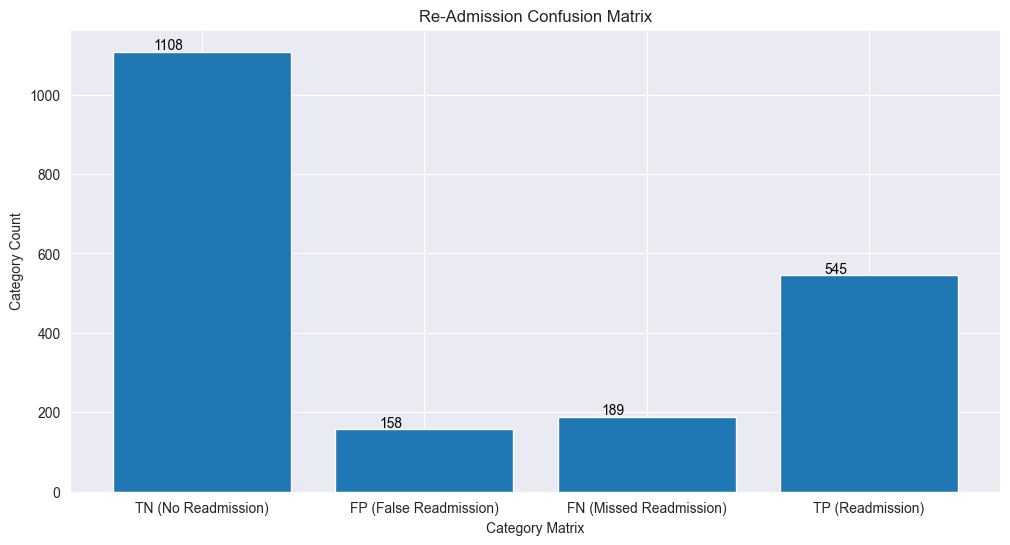

In [293]:
'''
Confusion Matrix
    Is a specific table layout that allows visualizations of the performance of algorithms such as classification algorithms. Because we are using a RandomForestClassification algorithm a confusion matrix is a great way to visualize: 
    
    * True Positives (TP)
    * True Negatives (TN)
    * False Positives (FP)
    * False Negatives (FN)
    
    It also provides the calculations for:
    * Accuracy
    * Precision
    * Recall
    * F1-Score
'''

readmission_confusion_matrix = confusion_matrix(y_test, y_target_predictions)
true_negatives, false_positives, false_negatives, true_positives = readmission_confusion_matrix.ravel()

matrix_values = [true_negatives, false_positives, false_negatives, true_positives]
matrix_labels = ['TN (No Readmission)', 'FP (False Readmission)', 'FN (Missed Readmission)', 'TP (Readmission)']

#Display Confusion Matrix
plt.figure(figsize=(12, 6))
bars = plt.bar(matrix_labels, matrix_values)
plt.xlabel('Category Matrix')
plt.ylabel('Category Count')
plt.title('Re-Admission Confusion Matrix')
plt.savefig('./readmission-confusion-matrix.png')

for bar, value in zip(bars, matrix_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15,
             bar.get_height() + 5,
             str(value),
             ha='center',
             color='black')

plt.show()



The Random Forest Classification reported accuracy of about 83% [0.8265]. 

<a id="code-references"></a>
# E1: Code References

<a id="source-references"></a>
# F1: Source References

 * Bruce, P., Bruce, A., &amp; Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using r and python. O’Reilly Media. <br /><br />
 * Upadhyay, S., Stephenson, A. L., &amp; Smith, D. G. (2019). Readmission rates and Their Impact on Hospital Financial Performance: A Study of Washington Hospitals. Inquiry : a journal of medical care organization, provision and financing. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6614936/  <br /><br />
 * Geron, A. (2022). Hands-on machine learning with scikit-learn, Keras, and tensorflow 3E: Concepts, tools, and techniques to build Intelligent Systems. O’Reilly Media.  